# Vicious adversary experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import viciousArm
from Exp3 import exp3, exp3P, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


For this example we consider an adversarial adaptive opponent. 

At time $t=0$ all the rewards are $0$.

Then then reward given by playing arm $k$ at time $t$ is $0$ if the arm played at time $t-1$ was also $k$ and $1$ otherwise.

In [2]:
K = 2
T = 2000

In [3]:
#set up the parameters
delta = 0.05
eta = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta = np.sqrt(2*np.log(K)/(K*T))
gamma = 0.5*eta

In [18]:
MAB = [viciousArm() for _ in range(K)]
rew, wgts, _ = exp3(MAB, T, eta=eta, gamma=np.sqrt(K * log(K) / ((np.exp(1) - 1) * T)))

MAB = [viciousArm() for _ in range(K)]
rew_P, wgts_P, _ = exp3P(MAB, T, beta=beta, gamma=gamma, eta=eta)

MAB = [viciousArm() for _ in range(K)]
rew_IX, wgts_IX, _ = exp3_IX(MAB, T, eta=eta, gamma=0.5)

MAB = [viciousArm() for _ in range(K)]
rew_UCB, _ = UCB1(MAB, T, rho=0.2)

MAB = [viciousArm() for _ in range(K)]
rew_random = Random(MAB, T)

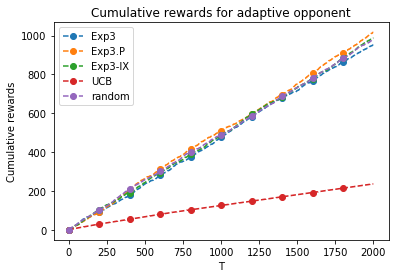

In [20]:
# Cumulative rewards for each algorithm
exp3_cumsum = np.cumsum(rew)
exp3_P_cumsum = np.cumsum(rew_P)
exp3_IX_cumsum = np.cumsum(rew_IX)
UCB_cumsum = np.cumsum(rew_UCB)
random_cumsum = np.cumsum(rew_random)

plt.plot(exp3_cumsum, '--o', markevery=200, label="Exp3")
plt.plot(exp3_P_cumsum, '--o', markevery=200, label="Exp3.P")
plt.plot(exp3_IX_cumsum, '--o', markevery=200, label="Exp3-IX")

plt.plot(UCB_cumsum, '--o', markevery=200, label="UCB")
plt.plot(random_cumsum, '--o', markevery=200, label="random")

plt.legend(loc="upper left")
plt.title("Cumulative rewards for adaptive opponent")
plt.xlabel('T')
plt.ylabel('Cumulative rewards')
savefig('AdaptiveOpponent')

Exponential weighting algorithms give roughly $\frac{T}{2}$ cumulative rewards after $T$ steps. The simple algorithm which switches arm at each step would give $T$.